In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [13]:
df = pd.read_csv('data/data.csv')

In [58]:
df.corr()['suicides_no'].sort_values(ascending=False)

sui_by_total          1.000000
suicides_no           1.000000
sui_by_pop            0.434660
population            0.356029
gdp_for_year          0.344868
is_male               0.170161
country              -0.000099
gdp_per_capita ($)   -0.022980
year                 -0.045340
age                  -0.051770
generation           -0.098487
Name: suicides_no, dtype: float64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21703 entries, 0 to 21702
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             21703 non-null  int64  
 1   year                21703 non-null  int64  
 2   age                 21703 non-null  int64  
 3   suicides_no         21703 non-null  int64  
 4   population          21703 non-null  int64  
 5   gdp_per_capita ($)  21703 non-null  int64  
 6   generation          21703 non-null  int64  
 7   sui_by_pop          21703 non-null  float64
 8   sui_by_total        21703 non-null  float64
 9   gdp_for_year        21703 non-null  int64  
 10  is_male             21703 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 1.8 MB


In [15]:
df.describe()

,country,year,age,suicides_no,population,gdp_per_capita ($),generation,sui_by_pop,sui_by_total,gdp_for_year,is_male
count,21703.000000,21703.000000,21703.000000,21703.000000,2.170300e+04,21703.000000,21703.000000,21703.000000,2.170300e+04,2.170300e+04,21703.000000
mean,45.530894,2000.960374,2.523937,42.241718,6.484881e+05,14642.608626,2.725291,0.000109,3.657710e-05,7.713496e+10,0.473022
std,27.358578,8.428637,1.722491,65.053538,1.268192e+06,17923.304471,1.790422,0.000174,5.632985e-05,1.086982e+11,0.499283
min,0.000000,1985.000000,0.000000,0.000000,2.780000e+02,251.000000,0.000000,0.000000,0.000000e+00,4.691962e+07,0.000000
25%,23.000000,1994.000000,1.000000,1.000000,5.251300e+04,3051.000000,1.000000,0.000005,8.658998e-07,5.329214e+09,0.000000
50%,43.000000,2001.000000,3.000000,11.000000,2.854980e+05,7459.000000,2.000000,0.000046,9.524898e-06,2.396528e+10,0.000000
75%,68.000000,2008.000000,4.000000,55.000000,6.336760e+05,20270.500000,4.000000,0.000140,4.762449e-05,1.040666e+11,1.000000
max,95.000000,2016.000000,5.000000,322.000000,1.827220e+07,126352.000000,5.000000,0.002250,2.788197e-04,4.892852e+11,1.000000


In [16]:
df.sample(5)

,country,year,age,suicides_no,population,gdp_per_capita ($),generation,sui_by_pop,sui_by_total,gdp_for_year,is_male
6134,26,1999,4,71,516749,35763,5,0.000137,0.000061,177965224621,0
8285,34,2010,2,128,1685691,27886,2,0.000076,0.000111,299361576558,1
19401,85,1991,3,2,42788,1235,4,0.000047,0.000002,448300000,0
9758,39,2000,4,3,20653,34372,5,0.000145,0.000003,8927140438,0
15335,64,2008,2,13,577902,3438,0,0.000022,0.000011,18504130753,0


In [59]:
X = df.drop(['suicides_no','sui_by_total'],1)
y = df['suicides_no']

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [61]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=26)

In [62]:
scaler = MinMaxScaler()

In [63]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [66]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [67]:
df_res = pd.DataFrame()
df_res['actual'] = y_test
df_res['pred'] = pred
df_res['MSE'] = mean_squared_error(y_test,pred)
df_res['error'] = y_test - pred


In [68]:
df_res.head()

,actual,pred,MSE,error
19452,1,50.467842,2340.678388,-49.467842
937,6,35.269912,2340.678388,-29.269912
12188,205,173.594497,2340.678388,31.405503
11026,71,116.085614,2340.678388,-45.085614
20974,18,55.142343,2340.678388,-37.142343


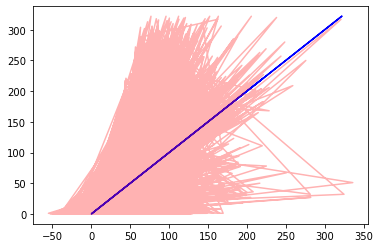

In [69]:
plt.plot(df_res['actual'],df_res['actual'],'b',alpha=1)
plt.plot(df_res['pred'],df_res['actual'],'r',alpha=0.3)

In [70]:
print(f'MSE: {mean_squared_error(y_test,pred)}')
print(f'SRMSE: {np.sqrt(mean_squared_error(y_test,pred))}')
print(f'MAE: {mean_absolute_error(y_test,pred)}')
print(f'r2: {r2_score(y_test,pred)}')

MSE: 2340.67838801694
SRMSE: 48.38055795479151
MAE: 30.181834021093753
r2: 0.4433892485891664


In [71]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

********** LinearRegression() **********
MSE: 2340.67838801694
SRMSE: 48.38055795479151
MAE: 30.181834021093753
r2: 0.4433892485891664
       actual        pred          MSE       error
19452       1   50.467842  2340.678388  -49.467842
937         6   35.269912  2340.678388  -29.269912
12188     205  173.594497  2340.678388   31.405503
11026      71  116.085614  2340.678388  -45.085614
20974      18   55.142343  2340.678388  -37.142343
...       ...         ...          ...         ...
7900       18   33.180319  2340.678388  -15.180319
13625      36  174.983189  2340.678388 -138.983189
16706      65   49.869453  2340.678388   15.130547
7368       10   30.727842  2340.678388  -20.727842
5591      221  139.566542  2340.678388   81.433458

[7162 rows x 4 columns]


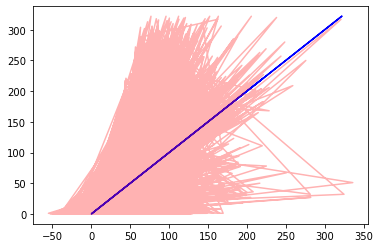

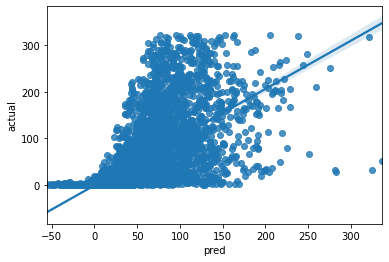

********************
********** Ridge() **********
MSE: 2343.646347276166
SRMSE: 48.411221295027936
MAE: 30.255960162509275
r2: 0.44268347113512063
       actual        pred          MSE       error
19452       1   50.437690  2343.646347  -49.437690
937         6   35.539219  2343.646347  -29.539219
12188     205  171.816482  2343.646347   33.183518
11026      71  115.142038  2343.646347  -44.142038
20974      18   54.594108  2343.646347  -36.594108
...       ...         ...          ...         ...
7900       18   33.178766  2343.646347  -15.178766
13625      36  173.110215  2343.646347 -137.110215
16706      65   49.585233  2343.646347   15.414767
7368       10   30.928893  2343.646347  -20.928893
5591      221  138.208251  2343.646347   82.791749

[7162 rows x 4 columns]


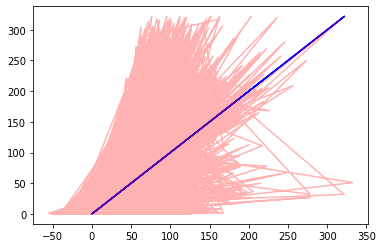

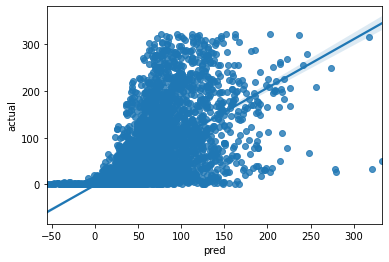

********************
********** Lasso() **********
MSE: 2886.0017135185703
SRMSE: 53.72152002241346
MAE: 36.18149149838928
r2: 0.3137119603622798
       actual        pred          MSE       error
19452       1   50.233482  2886.001714  -49.233482
937         6   34.322206  2886.001714  -28.322206
12188     205  101.938485  2886.001714  103.061515
11026      71   80.187161  2886.001714   -9.187161
20974      18   31.892983  2886.001714  -13.892983
...       ...         ...          ...         ...
7900       18   36.193724  2886.001714  -18.193724
13625      36   79.658151  2886.001714  -43.658151
16706      65   32.692285  2886.001714   32.307715
7368       10   36.457077  2886.001714  -26.457077
5591      221   89.445606  2886.001714  131.554394

[7162 rows x 4 columns]


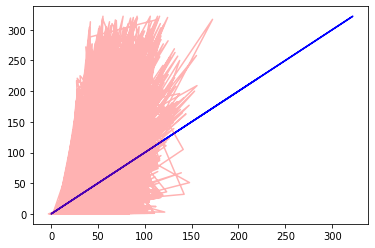

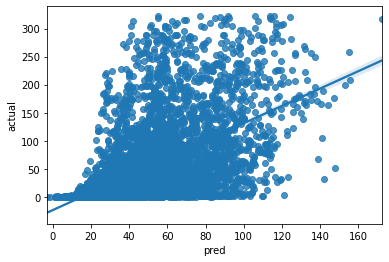

********************
********** AdaBoostRegressor() **********
MSE: 1365.3028099190192
SRMSE: 36.95000419376186
MAE: 30.735514900748072
r2: 0.6753324904340305
       actual        pred         MSE      error
19452       1   22.198859  1365.30281 -21.198859
937         6   59.729064  1365.30281 -53.729064
12188     205  186.590266  1365.30281  18.409734
11026      71   65.662014  1365.30281   5.337986
20974      18   39.636644  1365.30281 -21.636644
...       ...         ...         ...        ...
7900       18   49.462763  1365.30281 -31.462763
13625      36   48.920635  1365.30281 -12.920635
16706      65  159.878582  1365.30281 -94.878582
7368       10   41.740113  1365.30281 -31.740113
5591      221  194.769213  1365.30281  26.230787

[7162 rows x 4 columns]


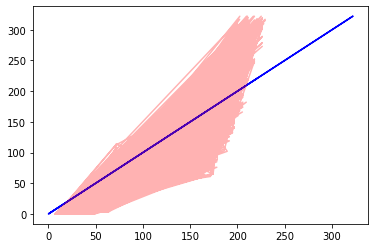

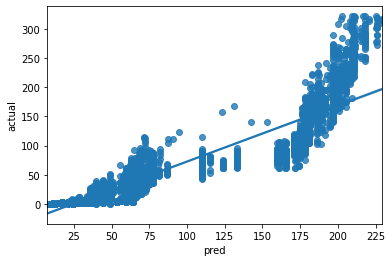

********************
********** DecisionTreeRegressor() **********
MSE: 25.03923485060039
SRMSE: 5.003921946893295
MAE: 1.7839988829935771
r2: 0.9940456974369927
       actual   pred        MSE  error
19452       1    1.0  25.039235    0.0
937         6    6.0  25.039235    0.0
12188     205  194.0  25.039235   11.0
11026      71   64.0  25.039235    7.0
20974      18   20.0  25.039235   -2.0
...       ...    ...        ...    ...
7900       18   19.0  25.039235   -1.0
13625      36   29.0  25.039235    7.0
16706      65   79.0  25.039235  -14.0
7368       10   10.0  25.039235    0.0
5591      221  216.0  25.039235    5.0

[7162 rows x 4 columns]


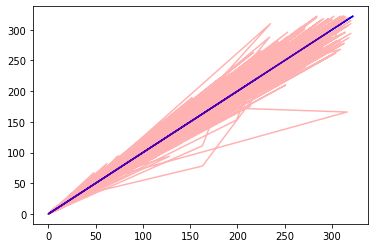

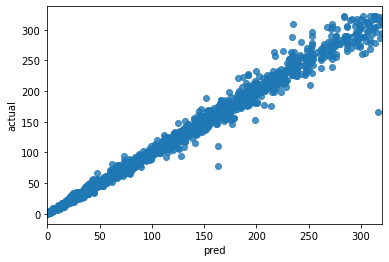

********************
********** RandomForestRegressor() **********
MSE: 6.798460583635856
SRMSE: 2.6073857757600534
MAE: 0.8194819882714326
r2: 0.9983833335355822
       actual    pred       MSE  error
19452       1    1.16  6.798461  -0.16
937         6    6.01  6.798461  -0.01
12188     205  202.24  6.798461   2.76
11026      71   69.27  6.798461   1.73
20974      18   18.27  6.798461  -0.27
...       ...     ...       ...    ...
7900       18   18.50  6.798461  -0.50
13625      36   36.16  6.798461  -0.16
16706      65   69.75  6.798461  -4.75
7368       10   10.05  6.798461  -0.05
5591      221  221.39  6.798461  -0.39

[7162 rows x 4 columns]


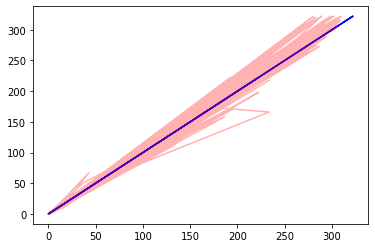

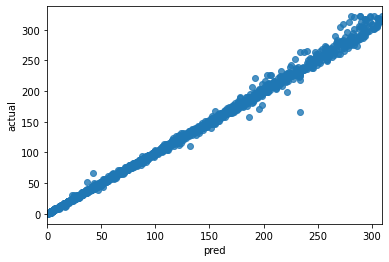

********************


In [72]:
models = [LinearRegression(),Ridge(),Lasso(),AdaBoostRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    cv_results = cross_validate(model, X_train, y_train, cv=3)

    print('*'*10,model,'*'*10)
    print(f'MSE: {mean_squared_error(y_test,pred)}')
    print(f'SRMSE: {np.sqrt(mean_squared_error(y_test,pred))}')
    print(f'MAE: {mean_absolute_error(y_test,pred)}')
    print(f'r2: {r2_score(y_test,pred)}')
    #print('',cv_results)

    
    df_res = pd.DataFrame()
    df_res['actual'] = y_test
    df_res['pred'] = pred
    df_res['MSE'] = mean_squared_error(y_test,pred)
    df_res['error'] = y_test - pred
    print(df_res)
    
    plt.plot(df_res['actual'],df_res['actual'],'b',alpha=1)
    plt.plot(df_res['pred'],df_res['actual'],'r',alpha=0.3)
    plt.show()
    sns.regplot(data=df_res,x='pred',y='actual')
    plt.show()
    print('*'*20)




********** RandomForestRegressor() **********
MSE: 6.653599287908404
SRMSE: 2.579457169233171
MAE: 0.8209871544261378
r2: 0.9984177813926983


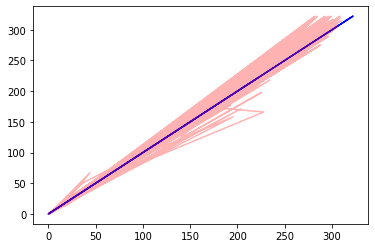

********************


In [76]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print('*'*10,model,'*'*10)
print(f'MSE: {mean_squared_error(y_test,pred)}')
print(f'SRMSE: {np.sqrt(mean_squared_error(y_test,pred))}')
print(f'MAE: {mean_absolute_error(y_test,pred)}')
print(f'r2: {r2_score(y_test,pred)}')

df_res = pd.DataFrame()
df_res['actual'] = y_test
df_res['pred'] = pred
df_res['MSE'] = mean_squared_error(y_test,pred)
df_res['error'] = y_test - pred
#print(df_res)

plt.plot(df_res['actual'],df_res['actual'],'b',alpha=1)
plt.plot(df_res['pred'],df_res['actual'],'r',alpha=0.3)
plt.show()
print('*'*20)

In [77]:
df_res.sample(15)

,actual,pred,MSE,error
19712,232,232.74,6.653599,-0.74
3466,0,0.00,6.653599,0.00
583,0,0.00,6.653599,0.00
14867,7,7.04,6.653599,-0.04
10709,0,0.00,6.653599,0.00
2835,72,72.23,6.653599,-0.23
12906,4,4.07,6.653599,-0.07
1264,0,0.00,6.653599,0.00
5892,0,0.00,6.653599,0.00
2139,0,0.00,6.653599,0.00


<AxesSubplot:xlabel='pred', ylabel='actual'>

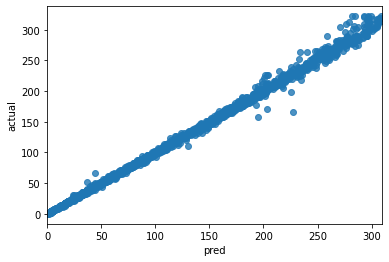

In [78]:
sns.regplot(data=df_res,x='pred',y='actual')

In [79]:
import pickle

In [80]:
filename = 'models/model.pk'
pickle.dump(model, open(filename, 'wb'))
